<a href="https://colab.research.google.com/github/Richofedhias/Data_Survive_Titanic/blob/main/Data_Survive_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as pp
from sklearn.ensemble import RandomForestRegressor
import pickle
from sklearn import tree

In [7]:
dtrain = pd.read_csv('sample_data/train.csv')

In [8]:
dtrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
dtrain = dtrain.drop(['PassengerId'], axis = 1)
dtrain = dtrain.drop(['Name'], axis = 1)
dtrain = dtrain.drop(['Ticket'], axis = 1)
dtrain = dtrain.drop(['Cabin'], axis = 1)
# Untuk Drop Tabel

In [10]:
dtrain['Embarked'].describe()
# Untuk Menjelaskan kolomnya

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [11]:
dtrain['Sex'].isna().sum()
# Untuk Menjelaskan data yang kosong

0

In [12]:
dtrain.corr(method='spearman')
# Mencari Korelasi antar kolom

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.339668,-0.052565,0.088879,0.138266,0.323736
Pclass,-0.339668,1.000000,-0.361666,-0.043019,-0.022801,-0.688032
Age,-0.052565,-0.361666,1.000000,-0.182061,-0.254212,0.135051
SibSp,0.088879,-0.043019,-0.182061,1.000000,0.450014,0.447113
Parch,0.138266,-0.022801,-0.254212,0.450014,1.000000,0.410074
Fare,0.323736,-0.688032,0.135051,0.447113,0.410074,1.000000


In [13]:
dtrain = dtrain[dtrain['Embarked'].notna()]
# Untuk Mengisi Data yang kosong

In [14]:
dtrain = dtrain[dtrain['Age'].notna()]
# Untuk Mengisi Data yang kosong

In [15]:
dtrain.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [16]:
dtrain["Age"].fillna(method="ffill")

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 712, dtype: float64

In [17]:
dtrain['Age'].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [18]:
dtrain['Age'] = dtrain["Age"].astype(np.int64)
# Convert to integer

In [19]:
dtrain.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S


In [20]:
dtrain["Sex"].unique()

array(['male', 'female'], dtype=object)

In [21]:
dtrain.loc[dtrain['Sex'] == 0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [22]:
dtrain = dtrain[dtrain['Sex'] != 0]

In [23]:
label_enc = LabelEncoder()
dtrain["Sex"] = label_enc.fit_transform(dtrain["Sex"])

In [24]:
label_enc = LabelEncoder()
dtrain["Embarked"] = label_enc.fit_transform(dtrain["Embarked"])

In [25]:
dtrain.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,2
1,1,1,0,38,1,0,71.2833,0
2,1,3,0,26,0,0,7.9250,2
3,1,1,0,35,1,0,53.1000,2
4,0,3,1,35,0,0,8.0500,2


In [26]:
dtrain['Fare'].describe()

count    712.000000
mean      34.567251
std       52.938648
min        0.000000
25%        8.050000
50%       15.645850
75%       33.000000
max      512.329200
Name: Fare, dtype: float64

In [27]:
arr_fare = np.array(dtrain["Fare"])

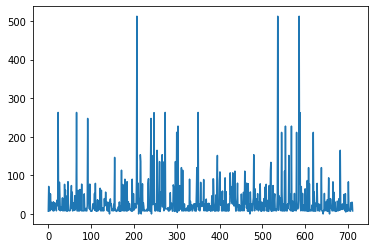

In [28]:
pp.plot(arr_fare)
pp.show()

In [29]:
for i in range(len(arr_fare)):
  if arr_fare[i] < 8 :
    arr_fare[i] = 0
  elif arr_fare[i] < 16 :
    arr_fare[i] = 1
  elif arr_fare[i] < 33 :
    arr_fare[i] = 2
  else:
    arr_fare[i] = 3

In [30]:
arr_fare

array([0., 3., 0., 3., 1., 3., 2., 1., 2., 2., 2., 1., 2., 0., 2., 2., 2.,
       2., 1., 1., 3., 2., 2., 3., 2., 1., 3., 3., 1., 2., 1., 1., 2., 3.,
       0., 2., 3., 0., 3., 2., 3., 1., 0., 2., 3., 0., 3., 2., 1., 1., 0.,
       1., 1., 3., 3., 1., 3., 0., 2., 1., 1., 1., 3., 1., 1., 3., 3., 1.,
       1., 0., 3., 2., 0., 3., 3., 2., 2., 0., 3., 1., 0., 0., 0., 0., 3.,
       1., 1., 1., 1., 0., 0., 2., 3., 2., 3., 2., 1., 3., 1., 0., 0., 0.,
       0., 1., 2., 1., 1., 2., 3., 1., 3., 0., 1., 0., 1., 3., 0., 3., 2.,
       1., 1., 3., 1., 1., 3., 0., 1., 2., 1., 0., 1., 3., 2., 2., 3., 3.,
       2., 1., 0., 2., 0., 2., 1., 0., 2., 3., 2., 2., 1., 0., 1., 1., 0.,
       2., 2., 3., 1., 1., 1., 0., 0., 1., 1., 1., 2., 0., 2., 0., 2., 0.,
       1., 3., 0., 2., 3., 1., 1., 1., 1., 3., 1., 1., 0., 1., 3., 0., 1.,
       2., 1., 2., 2., 1., 1., 1., 0., 0., 3., 0., 1., 3., 2., 1., 2., 2.,
       2., 1., 3., 3., 2., 2., 3., 0., 1., 3., 0., 3., 3., 0., 2., 2., 3.,
       0., 2., 2., 0., 0.

In [31]:
for i in range(len(arr_fare)):
  dtrain["Fare"][i] = arr_fare[i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
dtrain.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,0.0,2
1,1,1,0,38,1,0,3.0,0
2,1,3,0,26,0,0,0.0,2
3,1,1,0,35,1,0,3.0,2
4,0,3,1,35,0,0,1.0,2


In [33]:
dtrain['Fare'] = dtrain["Fare"].astype(np.int64)
# Convert to integer

In [34]:
dtrain.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,0,2
1,1,1,0,38,1,0,3,0
2,1,3,0,26,0,0,0,2
3,1,1,0,35,1,0,3,2
4,0,3,1,35,0,0,1,2


In [35]:
X = dtrain.iloc[:,1:]
Y = dtrain.iloc[:,0]
# Split survived sama Kolom kanan Semua

In [36]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

In [37]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22,1,0,0,2
1,1,0,38,1,0,3,0
2,3,0,26,0,0,0,2
3,1,0,35,1,0,3,2
4,3,1,35,0,0,1,2
...,...,...,...,...,...,...,...
885,3,0,39,0,5,29,1
886,2,1,27,0,0,13,2
887,1,0,19,0,0,30,2
889,1,1,26,0,0,30,0


In [38]:
# Learning Process

In [39]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X, Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [40]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
asd = clf.fit(X, Y)

In [41]:
filename = 'finalized_model_train.sav'
pickle.dump(asd, open(filename, 'wb'))

In [42]:
# File Testing

In [43]:
dtrain = pd.read_csv('sample_data/test.csv')

In [44]:
dtrain.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [45]:
dtrain = dtrain.drop(['PassengerId'], axis = 1)
dtrain = dtrain.drop(['Name'], axis = 1)
dtrain = dtrain.drop(['Ticket'], axis = 1)
dtrain = dtrain.drop(['Cabin'], axis = 1)
# Untuk Drop Tabel

In [46]:
dtrain['Embarked'].describe()
# Untuk Menjelaskan kolomnya

count     418
unique      3
top         S
freq      270
Name: Embarked, dtype: object

In [47]:
dtrain['Sex'].isna().sum()
# Untuk Menjelaskan data yang kosong

0

In [48]:
dtrain.corr(method='spearman')
# Mencari Korelasi antar kolom

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.471535,-0.118701,-0.043345,-0.753744
Age,-0.471535,1.000000,-0.015126,-0.130408,0.315220
SibSp,-0.118701,-0.015126,1.000000,0.412449,0.441343
Parch,-0.043345,-0.130408,0.412449,1.000000,0.378496
Fare,-0.753744,0.315220,0.441343,0.378496,1.000000


In [49]:
dtrain = dtrain[dtrain['Embarked'].notna()]
# Untuk Mengisi Data yang kosong

In [50]:
dtrain = dtrain[dtrain['Age'].notna()]
# Untuk Mengisi Data yang kosong

In [51]:
dtrain.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [52]:
dtrain["Age"].fillna(method="ffill")

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
409     3.0
411    37.0
412    28.0
414    39.0
415    38.5
Name: Age, Length: 332, dtype: float64

In [53]:
dtrain['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [54]:
dtrain['Age'] = dtrain["Age"].astype(np.int64)
# Convert to integer

In [55]:
dtrain.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34,0,0,7.8292,Q
1,3,female,47,1,0,7.0000,S
2,2,male,62,0,0,9.6875,Q
3,3,male,27,0,0,8.6625,S
4,3,female,22,1,1,12.2875,S


In [56]:
dtrain["Sex"].unique()

array(['male', 'female'], dtype=object)

In [57]:
dtrain.loc[dtrain['Sex'] == 0]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [58]:
dtrain = dtrain[dtrain['Sex'] != 0]

In [59]:
label_enc = LabelEncoder()
dtrain["Sex"] = label_enc.fit_transform(dtrain["Sex"])

In [60]:
label_enc = LabelEncoder()
dtrain["Embarked"] = label_enc.fit_transform(dtrain["Embarked"])

In [61]:
dtrain.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34,0,0,7.8292,1
1,3,0,47,1,0,7.0000,2
2,2,1,62,0,0,9.6875,1
3,3,1,27,0,0,8.6625,2
4,3,0,22,1,1,12.2875,2


In [62]:
dtrain['Fare'].describe()

count    331.000000
mean      40.982087
std       61.228558
min        0.000000
25%        8.050000
50%       16.000000
75%       40.633350
max      512.329200
Name: Fare, dtype: float64

In [63]:
arr_fare = np.array(dtrain["Fare"])

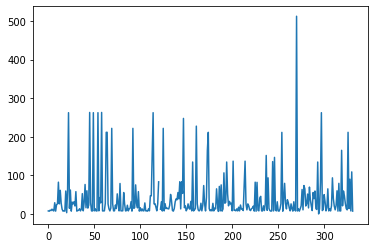

In [64]:
pp.plot(arr_fare)
pp.show()

In [65]:
for i in range(len(arr_fare)):
  if arr_fare[i] < 8 :
    arr_fare[i] = 0
  elif arr_fare[i] < 16 :
    arr_fare[i] = 1
  elif arr_fare[i] < 33 :
    arr_fare[i] = 2
  else:
    arr_fare[i] = 3

In [66]:
arr_fare

array([0., 0., 1., 1., 1., 1., 0., 2., 0., 2., 2., 3., 2., 3., 2., 1., 0.,
       0., 0., 3., 0., 3., 3., 1., 3., 0., 2., 2., 2., 2., 3., 0., 1., 1.,
       1., 0., 1., 3., 0., 2., 3., 1., 3., 1., 2., 3., 2., 0., 0., 3., 0.,
       1., 0., 0., 3., 0., 3., 2., 3., 0., 0., 0., 2., 3., 3., 2., 1., 0.,
       1., 3., 2., 0., 1., 2., 1., 3., 2., 0., 3., 0., 0., 1., 3., 2., 0.,
       1., 2., 0., 1., 1., 2., 0., 3., 1., 2., 3., 2., 1., 3., 0., 2., 0.,
       1., 1., 1., 2., 0., 0., 0., 1., 1., 3., 3., 3., 3., 2., 2., 2., 1.,
       2., 3., 3., 1., 2., 0., 3., 0., 2., 1., 1., 1., 1., 2., 3., 3., 1.,
       0., 1., 2., 3., 3., 3., 3., 3., 1., 3., 3., 3., 2., 2., 1., 1., 2.,
       1., 1., 2., 0., 3., 0., 1., 1., 3., 2., 1., 0., 1., 2., 0., 2., 3.,
       2., 0., 3., 3., 3., 1., 1., 1., 0., 2., 0., 1., 1., 3., 2., 0., 3.,
       0., 3., 0., 1., 3., 2., 2., 3., 3., 2., 2., 2., 2., 0., 3., 1., 1.,
       1., 1., 0., 2., 0., 2., 1., 1., 1., 3., 3., 2., 1., 2., 2., 1., 1.,
       1., 1., 2., 0., 3.

In [67]:
for i in range(len(arr_fare)):
  dtrain["Fare"][i] = arr_fare[i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [68]:
dtrain.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34,0,0,0.0,1
1,3,0,47,1,0,0.0,2
2,2,1,62,0,0,1.0,1
3,3,1,27,0,0,1.0,2
4,3,0,22,1,1,1.0,2


In [69]:
dtrain['Fare'] = dtrain["Fare"].astype(np.int64)
# Convert to integer

In [70]:
dtrain.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34,0,0,0,1
1,3,0,47,1,0,0,2
2,2,1,62,0,0,1,1
3,3,1,27,0,0,1,2
4,3,0,22,1,1,1,2


In [71]:
X = dtrain.iloc[:,1:]
Y = dtrain.iloc[:,0]
# Split survived sama Kolom kanan Semua

In [72]:
X

,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,34,0,0,0,1
1,0,47,1,0,0,2
2,1,62,0,0,1,1
3,1,27,0,0,1,2
4,0,22,1,1,1,2
...,...,...,...,...,...,...
409,0,3,1,1,13,2
411,0,37,1,0,90,1
412,0,28,0,0,7,2
414,0,39,0,0,108,0


In [73]:
# Processing

In [74]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X, Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [75]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
asd = clf.fit(X, Y)

In [76]:
filename = 'finalized_model_testing.sav'
pickle.dump(asd, open(filename, 'wb'))